<a href="https://colab.research.google.com/github/Chethana54/mini-project/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("Lotus Water Lily",limit=50,output_dir='images',adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 22 Images on Page 1.


[%] Downloading Image #1 from https://media.istockphoto.com/photos/lotus-water-lily-picture-id477723144?k=6&amp;m=477723144&amp;s=170667a&amp;w=0&amp;h=wbChwNwRITAdq55lXffiAjB2jiaW8hDg9GWmN9w7MUI=
[%] File Downloaded !

[%] Downloading Image #2 from https://www.wallpapers13.com/wp-content/uploads/2019/07/Flower-lotus-Water-Lily-aquatic-plant-blossom-wildflower-macro-photography.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.fanartreview.com/farusr/321120/w-321120-577447.JPG
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.eyeem.com/thumb/528c3be65c51f022119619dcb4a2982497a06856-1570691434110/640/480
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/99/5d/8b/995d8b0dad2fc0bdd2c6b61b1d5769c2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://thumbs.dreamstime.com/b/water-lily-lotus-24289195.jpg
[%] File Downloaded !

[%] Downloading Image #7 fro

In [ ]:
from bing_image_downloader import downloader
downloader.download("Tree",limit=50,output_dir='images',adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.singtree.com/sites/singtree.com/files/styles/colorbox_large/public/shopify_images/tsukasaSilhouette23.jpg?itok=0GoxDyTM
[%] File Downloaded !

[%] Downloading Image #2 from https://beautyharmonylife.com/wp-content/uploads/2013/11/White-Christmas-Tree-Ornaments.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://hative.com/wp-content/uploads/2014/04/cardboard-crafts/10-cardboard-christmas-tree.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.plantant.com/supplierimages/image.php/pinus-elliottii-densa-densa-pine-south-florida-slash-pine-1000722824-1471999566.jpg?width=1000&amp;height=1000&amp;image=/public/supplierimages/plants/1000722824-1471999566.jpg
[!] Issue getting: https://www.plantant.com/supplierimages/image.php/pinus-elliottii-densa-densa-pine-south-florida-slash-pine-1000722824-1471999566.jpg?width=1000&amp;height=1000&amp;image=/public/supplier

In [ ]:
#pre processing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['Lotus Water Lily','Tree']
for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = imread(os.path.join(path,img))
      #print(img_array.shape)
      #plt.imshow(img_array)
      img_resized = resize(img_array,(150,150,3))
      flat_data.append(img_resized.flatten())
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)     



In [ ]:
flat_data[0]

array([0.12201882, 0.29827451, 0.46713725, ..., 0.09437333, 0.11788235,
       0.0829281 ])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

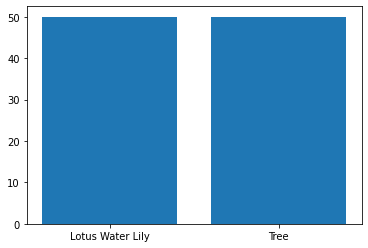

In [ ]:
unique,count = np.unique(target,return_counts = True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state = 109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[13,  0],
       [ 0, 17]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/e/eb/Ash_Tree_-_geograph.org.uk_-_590710.jpg
(640, 480, 3)
 PREDICTED OUTPUT: Tree


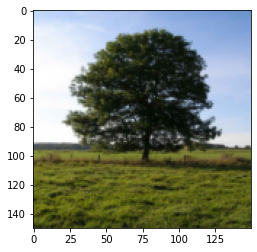

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f" PREDICTED OUTPUT: {y_out}")                


In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 6.2MB/s 
     |████████████████████████████████| 163kB 43.1MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 4.2MB 49.7MB/s 
     |████████████████████████████████| 112kB 32.5MB/s 
     |████████████████████████████████| 71kB 4.7MB/s 
     |████████████████████████████████| 122kB 49.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=8faef4778daf99559e902662e6eaf22422c1a910be9de4e86de68a4f697619c2
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.4 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 5.2MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=eb3437abeb781e2498db7f875c8cb3b62c6fa683fb428963301879a2fb178cac
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
